# Bank Marketing Campaign

### **Contents**

1. Business Problem and Data Understanding
2. Data Preperation
3. Modeling
4. Conclusion and Recommendations

## Business Problem and Data Understanding

In [217]:
# Library
import pandas as pd
import numpy as np
import math

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

### Data
The following [Bank Marketing Campaign Dataset](https://drive.google.com/drive/folders/13lrEDlKfnTPNREfGLBaYGYf8dSjHBzfW) depicts the results of a bank marketing campaign. The campaign primarily relied on direct phone calls, offering bank clients the opportunity to place fixed-term deposits. In the end, if the campaign call was successful, it will show 'yes' under the deposit column. If the campaign was not successful for the targeted consumer, then there will be a 'no' under the deposit column.

A large part of the given data types are nominal, binary and odrinal. This dataset contains information related to the campaign, and below are some of the customer's profiles as well as the marketing data, which include:

1.) Age : Age of contacted customer 

2.) Job : Job of contacetd customer

3.) Balance : Current Balance of contacted customer

4.) Housing: Whether the contact has a house or not

5.) Loan: Whether the contact has a loan or not

6.) Contact: Contact communication type

7.) Month: Last contact month of the year

8.) Campaign: Number of contacts performed during this campaign and for this client

9.) Pdays: Number of days after the client was contacted from the previous campaign

10.) Poutcome: Outcome of the previous marketing campaign

11.) Deposit: Whether the customer deposits or not.

### Problem Statement:
As business entities offering financial products to our customers, banks must continually compete to retain and attract new clients. Acquiring new customers often involves conducting marketing campaigns. Therefore, to enhance our banks, it is imperative to consistently improve our campaigns for increased effectiveness and efficiency.

A few ways we can do that is by reducing the time and resources taken in executing these campaigns. For example, we can screen the total target customer first to make sure that we source customers with proper interest in placing bank deposits to make the campaign more efficient.
By having a screening or sourcing process where only potentional depositers are the ones approached. It could reduce the time and cost of these marketing campaigns while also optimizing these campaigns.

This way stakeholders of the bank, such as the marketing team, would have an easier time doing these campaigns with higher probabilities of success.

### Goals and Target:

Based on the problemn above, our main goal of this project is to create a classification model where they will have the ability to predict and group the posisbility that a customer wants or will place a deposit in the bank or not. This way the marketing team can focus the campaigns on contacts that are willing to place deposits with the bank.
Through this model, we will also hopefully provide the higher ups of the company and marketing department reasons or factors that could alter a contacts behaviour as well as reasoning to place a deposit in the bank. The reason this is important, is it can enhance the planning for when approachinig potential candidates. 
Ultimately, to win against their competitors in regards to gaining more clients using these campaigns and increasing profits for the company.

The targets that will be found in the end is defined as:

0 (No): customer not investing in a term deposit.
1 (Yes): customer investing in a term deposit.

### Analytical Approach and Metric Evaluation:
With the given dataset provided, I plan to analyze the given data and understand the patterns and chracteristics that distinguishes prospectives contacts that wish to open a deposit account. After which we will build a classification model that will help us reach the goals stated above, making candidate sourcing and screening mmore efficient.

### Metric Evaluation:
To prevent misclassification and provide a better accuracy of our model we will be discussing about the error types that may arise, which can be found below:

    1.) False Positive (Type 1 Error) : 
        When our model innacurately predicts a potenital consumer when they are not. This means the bank will face the unnecessary campaign costs, due to targetting contacts that are not interested (lost time, costs and resources)
        
    2.) False Negative (Type 2 Error) :
        When our model innacurately does not predict a potenital consumer when they are. This means the bank will face the lost of potential consumers and profits as they disregard interested contacts.
        
We will be using both the AUC (Area Under the Curve) and ROC (Receiver Operating Characteristic) curve as the main metric to make sure that the model can be used to differentiate between the positive and negative classes 
Both the ROC and AUC metric is used to show insights regaridng the models overall classification feature, this is because we want to reduce the cmapaign cost while creating a balance to gain the positive class or depositors.




## Data preparation

In [218]:
file_path = '/Users/catalina/Downloads/data_bank_marketing_campaign.csv'
df = pd.read_csv(file_path)
display(df.head(),df.tail())

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no


,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,yes
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown,no
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,no
7812,60,retired,1588,no,no,cellular,oct,1,-1,unknown,yes


In [219]:
print(f'Total number of rows and columns in the dataset are {df.shape}')
print(f'No missing values are found, so no data cleaning is needed')
df.info()

Total number of rows and columns in the dataset are (7813, 11)
No missing values are found, so no data cleaning is needed
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   object
dtypes: int64(4), object(7)
memory usage: 671.6+ KB


In [220]:
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,age,75,"[55, 39, 51, 38, 36, 41, 37, 35, 57, 23, 33, 3..."
1,job,12,"[admin., self-employed, services, housemaid, t..."
2,balance,3153,"[1662, -3058, 3025, -87, 205, -76, 4803, 911, ..."
3,housing,2,"[no, yes]"
4,loan,2,"[no, yes]"
5,contact,3,"[cellular, telephone, unknown]"
6,month,12,"[jun, apr, may, nov, jan, sep, feb, mar, aug, ..."
7,campaign,32,"[2, 3, 1, 4, 5, 6, 7, 30, 8, 9, 11, 14, 10, 28..."
8,pdays,422,"[-1, 352, 21, 91, 186, 263, 96, 355, 294, 412,..."
9,poutcome,4,"[unknown, other, failure, success]"


## Data Analysis and Feature Engineering

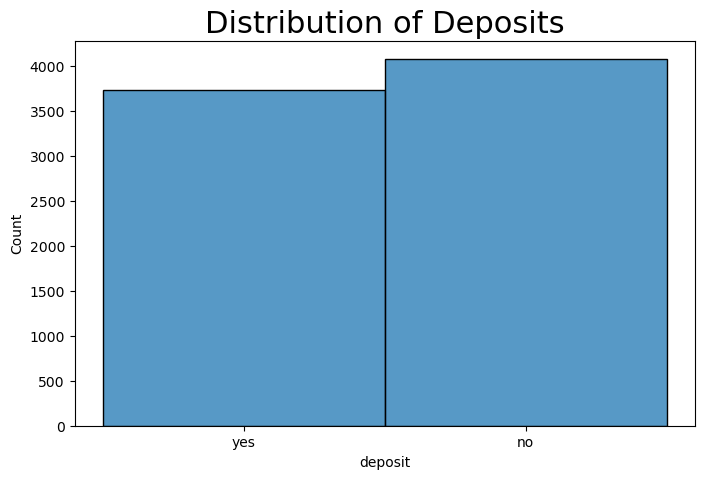

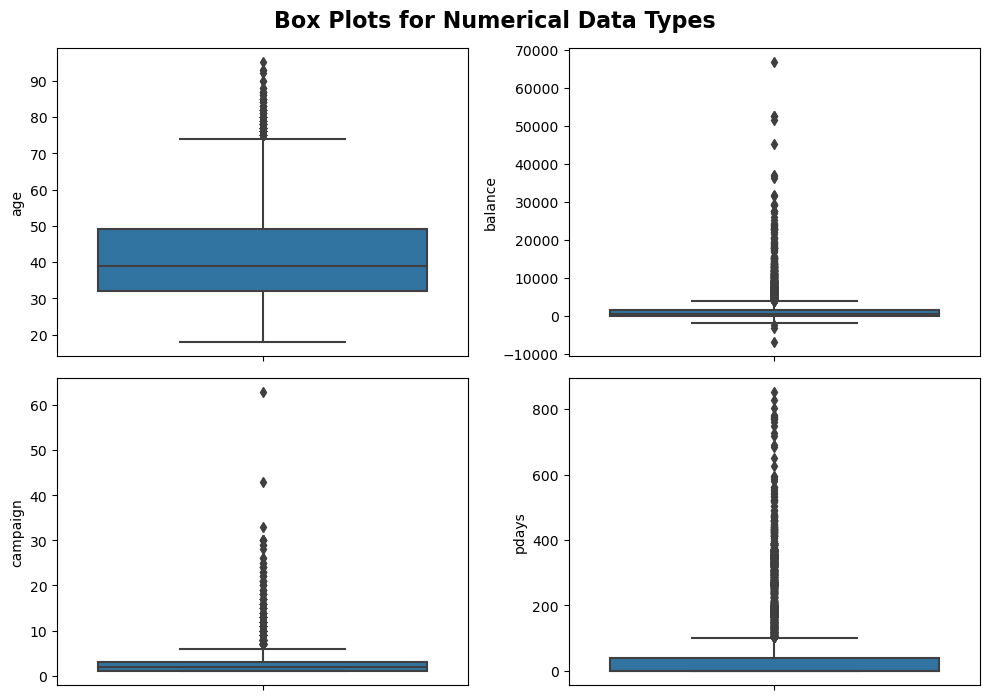

In [221]:
plt.figure(figsize=(8,17))

plt.subplot(311)
sns.histplot(data=df,x='deposit')
plt.title('Distribution of Deposits', fontsize=22)
plt.show()

plt.figure(figsize=(10, 10))
n = 3
for i in range(0, len(numerical_columns)):
    plt.subplot(n, math.ceil(len(numerical_columns)/n), i+1)
    sns.boxplot(y=df[numerical_columns[i]], orient='v')
    plt.tight_layout()

plt.suptitle('Box Plots for Numerical Data Types', fontsize=16, y=1.02, fontweight='bold')
plt.show()

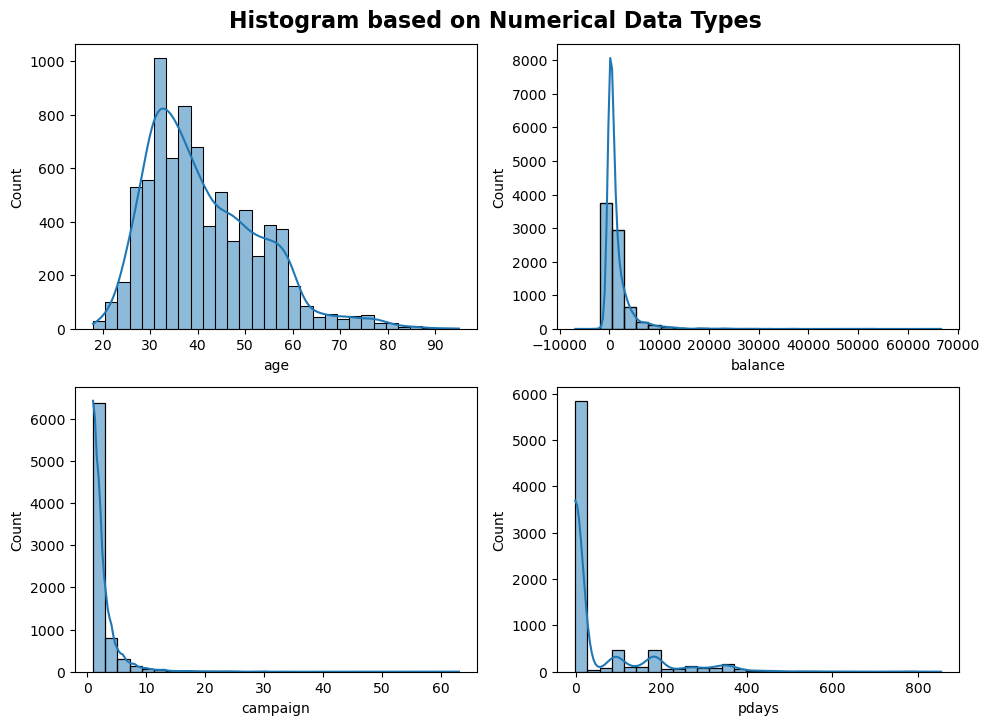

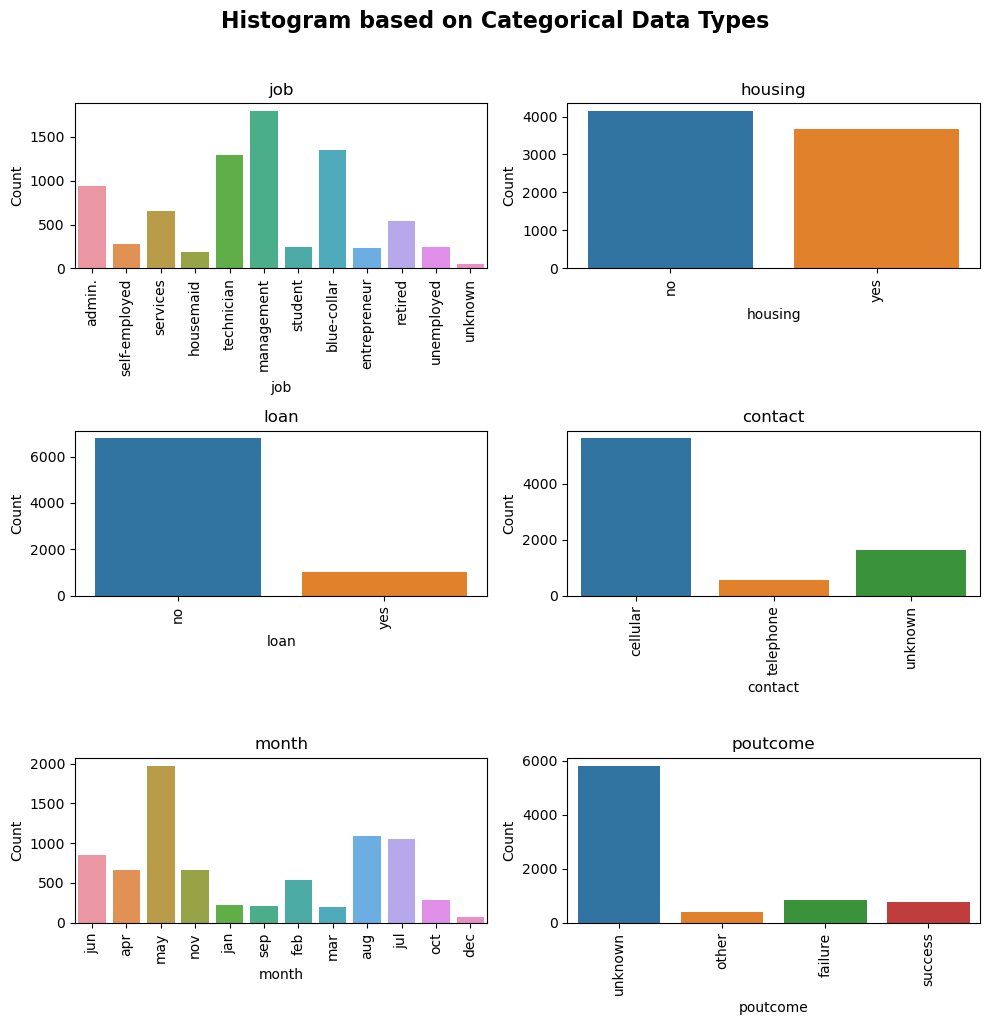

In [222]:
numerical_columns = ['age', 'balance', 'campaign', 'pdays',]
categorical_columns = ['job', 'housing', 'loan', 'contact', 'month', 'poutcome']
target = ['deposit']

plt.figure(figsize=(10, 10))
n = 3
for i in range(0, len(numerical_columns)):
    plt.subplot(n, math.ceil(len(numerical_columns)/n), i+1)
    sns.histplot(df[numerical_columns[i]], bins=30, kde=True)
    plt.tight_layout()

plt.suptitle('Histogram based on Numerical Data Types', fontsize=16, y=1.02, fontweight='bold')
plt.show()

plt.figure(figsize=(10, 10))
n = 3
for i, column in enumerate(categorical_columns):
    plt.subplot(n, math.ceil(len(categorical_columns)/n), i+1)
    bar_plot=sns.countplot(x=column, data=df)
    bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=90)
    plt.title(column)
    plt.ylabel('Count')

plt.suptitle('Histogram based on Categorical Data Types', fontsize=16, y=1.02, fontweight='bold')
plt.tight_layout()
plt.show()

### Insights from our Data Analysis:

Based on the diagrams and histograms above, we can conclude that:

1.) The histogram regarding the distribution of deposits, shows that the people who deposited and don't are relatively balanced, meaning no major unbalance outcome is seen. Hence, we do not need to handle imbalanceness in this specific aspect.

2.) The barplot regarding the outliers ithin the contacts shows us that there are a few outliers present in the datasets. However, with the large amount of counts and entries the outliers will not be deleted.

3.) The last few diagrams that focus on Numerical Data Types, shows us that majority of the variable distribution are positively skewed. Furthermore, the age of consumers that were targetted within the campaign are mostly the age of 30 - 40 years old. 

4.) An extremely l;arge portion of the contacted consumers do not have a loan.

5,) The type of job that are contacted through the campaign are part of management. This could mean that different employment levels and titles could have different rates of investing in deposits.

### Encoding Categorical Data:

"As you may know, encoding categorical data is a necessary step when preparing categorical data for modeling, especially when working with machine learning algorithms. Most machine learning models require numerical input, and categorical variables are typically represented by strings or labels, which need to be converted into numerical values. We will now do that using One-Hot Encoding.

Categorical columns include the job, housing, loan, contact, month, poutcome, and deposit columns will be encoded, and we are using the One-Hot Encoding method as the data are not in sequence, and the number of unique data is little."

In [223]:
transformer = ColumnTransformer([
    ('onehotencoder', OneHotEncoder(drop='first'), ['job', 'housing', 'loan', 'contact', 'month', 'poutcome'])
], remainder='passthrough')

In [224]:
x= df.drop(columns=['deposit'])
y=df['deposit']

x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.25,random_state=42)

In [225]:
x_train_b4processed = transformer.fit_transform(x_train).toarray()
x_train_b4processed

array([[ 0.000e+00,  0.000e+00,  0.000e+00, ...,  8.790e+02,  1.000e+00,
         3.440e+02],
       [ 0.000e+00,  0.000e+00,  0.000e+00, ...,  0.000e+00,  2.000e+00,
        -1.000e+00],
       [ 0.000e+00,  0.000e+00,  0.000e+00, ...,  4.290e+02,  1.000e+00,
        -1.000e+00],
       ...,
       [ 0.000e+00,  0.000e+00,  0.000e+00, ...,  3.300e+01,  2.000e+00,
        -1.000e+00],
       [ 0.000e+00,  0.000e+00,  1.000e+00, ...,  1.000e+01,  2.000e+00,
        -1.000e+00],
       [ 0.000e+00,  0.000e+00,  0.000e+00, ...,  2.193e+03,  3.000e+00,
        -1.000e+00]])

In [226]:
testing = pd.DataFrame(x_train_b4processed, columns=transformer.get_feature_names_out())
testing.dropna()

,onehotencoder__job_blue-collar,onehotencoder__job_entrepreneur,onehotencoder__job_housemaid,onehotencoder__job_management,onehotencoder__job_retired,onehotencoder__job_self-employed,onehotencoder__job_services,onehotencoder__job_student,onehotencoder__job_technician,onehotencoder__job_unemployed,...,onehotencoder__month_nov,onehotencoder__month_oct,onehotencoder__month_sep,onehotencoder__poutcome_other,onehotencoder__poutcome_success,onehotencoder__poutcome_unknown,remainder__age,remainder__balance,remainder__campaign,remainder__pdays
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,34.0,879.0,1.0,344.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,42.0,0.0,2.0,-1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,44.0,429.0,1.0,-1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,46.0,1723.0,2.0,52.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,41.0,0.0,2.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5854,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,35.0,1330.0,1.0,-1.0
5855,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,24.0,1123.0,1.0,412.0
5856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,35.0,33.0,2.0,-1.0
5857,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,32.0,10.0,2.0,-1.0


## Modelling and Evaluation

In [227]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, classification_report
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

lr = LogisticRegression()
rfc = RandomForestClassifier()
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier()


### Model Benchmarking ( Testing using the K-Fold Method)

In [228]:
models = [LogisticRegression(), RandomForestClassifier(), KNeighborsClassifier(), DecisionTreeClassifier()]

results = []
score_roc_auc = []

for model, name in zip(models, ['Logistic Regression', 'Random Forest Classifier', 'K Neighbors Classifier', 'Decision Tree Classifier']):
    estimator = Pipeline([
        ('b4process', transformer),
        ('model', model)
    ])
    
    
    k_fold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    cross_val_results = cross_val_score(estimator, x, y, cv=k_fold, scoring='roc_auc')
    
    for fold, roc_auc in enumerate(cross_val_results, start=1):
        print(f'{name}, Fold {fold}: ROC AUC = {roc_auc:.4f}')
    
    avg_roc_auc = cross_val_results.mean()
    score_roc_auc.append(avg_roc_auc)
    
    estimator.fit(x_train, y_train)
    y_pred_values = estimator.predict(x_test)
    y_pred_prob = estimator.predict_proba(x_test)[:, 1]
    

    print(f'\n{name} Final Evaluation:\n', classification_report(y_test, y_pred_values))
    results.append({'model': name, 'roc_auc_score': avg_roc_auc})

result_df = pd.DataFrame(results).sort_values(by='roc_auc_score', ascending=False)
print(result_df)

Logistic Regression, Fold 1: ROC AUC = 0.7582
Logistic Regression, Fold 2: ROC AUC = 0.7689
Logistic Regression, Fold 3: ROC AUC = 0.7427

Logistic Regression Final Evaluation:
               precision    recall  f1-score   support

          no       0.70      0.78      0.74      1021
         yes       0.72      0.63      0.67       933

    accuracy                           0.71      1954
   macro avg       0.71      0.70      0.70      1954
weighted avg       0.71      0.71      0.71      1954

Random Forest Classifier, Fold 1: ROC AUC = 0.7595
Random Forest Classifier, Fold 2: ROC AUC = 0.7609
Random Forest Classifier, Fold 3: ROC AUC = 0.7491

Random Forest Classifier Final Evaluation:
               precision    recall  f1-score   support

          no       0.69      0.79      0.74      1021
         yes       0.73      0.62      0.67       933

    accuracy                           0.71      1954
   macro avg       0.71      0.70      0.70      1954
weighted avg       0.71  

### Model Benchmarking

In [229]:
models = [LogisticRegression(), RandomForestClassifier(), KNeighborsClassifier(), DecisionTreeClassifier()]
score_roc_auc = []

def y_pred_values_function(model, x_train, y_train, x_test):
    estimator = Pipeline([
        ('b4process', transformer),
        ('model', model)
    ])
    estimator.fit(x_train, y_train)
    y_pred_values = estimator.predict(x_test)
    
    return estimator, y_pred_values

for model, name in zip(models, ['Logistic Regression', 'Random Forest Classifier', 'K Neighbors Classifier', 'Decision Tree Classifier']):
    estimator, y_pred_values = y_pred_values_function(model, x_train, y_train, x_test)
    y_pred_prob = estimator.predict_proba(x_test)[:, 1]
    score_roc_auc.append(roc_auc_score(y_test, y_pred_prob))
    print(name, '\n\n', classification_report(y_test, y_pred_values))

pd.DataFrame({'model': ['Logistic Regression', 'Random Forest Classifier', 'K Neighbors Classifier', 'Decision Tree Classifier'], 'roc_auc score': score_roc_auc}).sort_values(by='roc_auc score', ascending=False)

Logistic Regression 

               precision    recall  f1-score   support

          no       0.70      0.78      0.74      1021
         yes       0.72      0.63      0.67       933

    accuracy                           0.71      1954
   macro avg       0.71      0.70      0.70      1954
weighted avg       0.71      0.71      0.71      1954

Random Forest Classifier 

               precision    recall  f1-score   support

          no       0.69      0.78      0.73      1021
         yes       0.72      0.62      0.67       933

    accuracy                           0.70      1954
   macro avg       0.71      0.70      0.70      1954
weighted avg       0.71      0.70      0.70      1954

K Neighbors Classifier 

               precision    recall  f1-score   support

          no       0.60      0.66      0.63      1021
         yes       0.59      0.53      0.55       933

    accuracy                           0.60      1954
   macro avg       0.59      0.59      0.59      19

,model,roc_auc score
0,Logistic Regression,0.769099
1,Random Forest Classifier,0.754498
2,K Neighbors Classifier,0.628433
3,Decision Tree Classifier,0.618755


In the context of binary classification models, the ROC-AUC (Receiver Operating Characteristic - Area Under the Curve) score is a performance metric that measures the ability of a model to distinguish between the positive and negative classes. A higher ROC-AUC score indicates better performance.

In summary, having the highest ROC-AUC score signifies a model's excellence in distinguishing between positive and negative instances. 
Hence,with the highest ROC_AUC score coming from the logistic regression algorithm, we will be using this algorithm moving forward. It had the best performance among the other models in the test data.

### Modelling: Pickle

In [233]:
#PICKLING
import pickle

#Final Model
estimator.fit(x_train,y_train)
pickle.dump(estimator, open('Final_Model.sav', 'wb'))

campaign_data = pd.read_csv('data_bank_marketing_campaign.csv')

filename='Final_Model.sav'
load_model=pickle.load(open(filename,'rb'))

In [235]:
load_model

Pipeline(steps=[('b4process',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['job', 'housing', 'loan',
                                                   'contact', 'month',
                                                   'poutcome'])])),
                ('model', LogisticRegression())])

## Conclusion and Recommendations

In [231]:
logistic_regression_model = models[0]
estimator, y_pred_values = y_pred_values_function(logistic_regression_model, x_train, y_train, x_test)
y_pred_prob = estimator.predict_proba(x_test)[:, 1]
score_roc_auc.append(roc_auc_score(y_test, y_pred_prob))
print('Classification Report Using Logistic Regression: \n', classification_report(y_test, y_pred_values))

Classification Report Using Logistic Regression: 
               precision    recall  f1-score   support

          no       0.70      0.78      0.74      1021
         yes       0.72      0.63      0.67       933

    accuracy                           0.71      1954
   macro avg       0.71      0.70      0.70      1954
weighted avg       0.71      0.71      0.71      1954



With the model above, banks are now able to alleviate risks and save time, as well as resources when it comes to focusing on specific clients, ultimately becoming a more efficient process for the banks.

According to the results of the classification report from our model above, we can conclude that, based on the recall, if we use this model in the future to help source and screen the contacts that will be contacted for campaigns, our model can reduce about 78% of contacts that are not interested in our products, so that we do not waste our energy approaching these people. We can also learn that this model can aid us in gaining about 63% of customers from the given customer pool that are interested in depositing in our bank. The model above has an accuracy rate of 70%, regarding the prediction accuracy of customers who are interested in making deposits. Meaning that the probability, when our model predicts whether a customer is interested or not, has a 70% chance of being correct. Furthermore, about 22% of the customers predicted to at first be considered not interested customers will turn into or are predicted to be interested customers

### Recommendations:

1.) A second round of data should be tried out, maybe one with more information or details regarding the demographics of the contacts. This way we can figure out other potential aspects that could alter the decision of making deposits (For example, information about their current family size or education level). These would allow the model to predict in a more accurate manner.

2.) The bank can now look into developing the model that is initially created.

3.) Experimenting with other evaluation metrics, algorithms, or hyperparameter tuning.

4.) Finding out the reason why our model is yet to predict properly in some aspects of the modeling.

5.) Strive to discover more accurate calculations related to term deposits in banks; this way, we can provide solutions that better match with what our customers need.